In [28]:
import numpy as np
import matplotlib.pyplot as plt



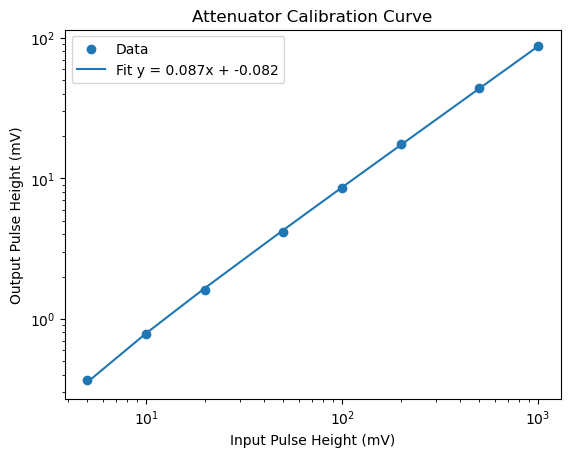

In [29]:
#attenuator calibration curve
input_pulse_height = np.array([5,10,20,50,100,200,500,1000])
output_pulse_height = np.array([0.370,0.774,1.61,4.14,8.535,17.48,43.81,86.90])

#fit a line to the data
a,b = np.polyfit(input_pulse_height,output_pulse_height,1)

plt.scatter(input_pulse_height,output_pulse_height,label = 'Data')
plt.plot(input_pulse_height,a*input_pulse_height+b,label = 'Fit y = %.3fx + %.3f' % (a,b))
#log scale
plt.yscale('log')
plt.xscale('log')

plt.xlabel('Input Pulse Height (mV)')
plt.ylabel('Output Pulse Height (mV)')
plt.title('Attenuator Calibration Curve')
plt.legend()

def attenuate(x):
    return a*x+b

In [30]:
ch_no = 4

if ch_no == 4:
    with open("/home/ppe/d/driley/OD_testing/DAC Threshold Scan/CH4_DAC_Threshold_17092024/CH4_DAC_THRESHOLD_170924.txt")  as file:
        data = file.readlines()
elif ch_no == 5:
    with open("/home/ppe/d/driley/OD_testing/DAC Threshold Scan/CH5_DAC_Threshold_18092024/DAC_THRESHOLD_CH5_180924.txt")  as file:
        data = file.readlines()
elif ch_no == 6:
    with open("/home/ppe/d/driley/OD_testing/DAC Threshold Scan/CH6_DAC_Threshold_19092024/DAC_THRESHOLD_CH6_190924.txt")  as file:
        data = file.readlines()


print(data)
data_dict = eval(data[0])
print(type(data_dict))

['{"4": {"3790": 5, "3791": 4, "3792": 1, "3793": 5, "3794": 4, "3795": 1, "3796": 1, "3797": 1, "3798": 5, "3799": 5, "3800": 1, "3801": 5, "3802": 1, "3803": 1, "3804": 1, "3805": 1, "3806": 1, "3807": 1, "3808": 1, "3809": 1, "3810": 1, "3811": 1, "3812": 1, "3813": 5, "3814": 5, "3815": 5, "3816": 1, "3817": 1, "3818": 1, "3819": 1, "3820": 1, "3821": 1, "3822": 1, "3823": 1, "3824": 1, "3825": 1, "3826": 8, "3827": 1, "3828": 1, "3829": 1, "3830": 4, "3831": 5, "3832": 1, "3833": 73, "3834": 293, "3835": 1157, "3836": 4913, "3837": 27000, "3838": 28000, "3839": 28000, "3840": 28000}, "6": {"3790": 1, "3791": 1, "3792": 4, "3793": 1, "3794": 1, "3795": 1, "3796": 1, "3797": 1, "3798": 1, "3799": 1, "3800": 1, "3801": 1, "3802": 5, "3803": 1, "3804": 1, "3805": 4, "3806": 1, "3807": 1, "3808": 1, "3809": 1, "3810": 1, "3811": 1, "3812": 1, "3813": 1, "3814": 1, "3815": 5, "3816": 1, "3817": 9, "3818": 1, "3819": 1, "3820": 1, "3821": 1, "3822": 5, "3823": 1, "3824": 1, "3825": 1, "3

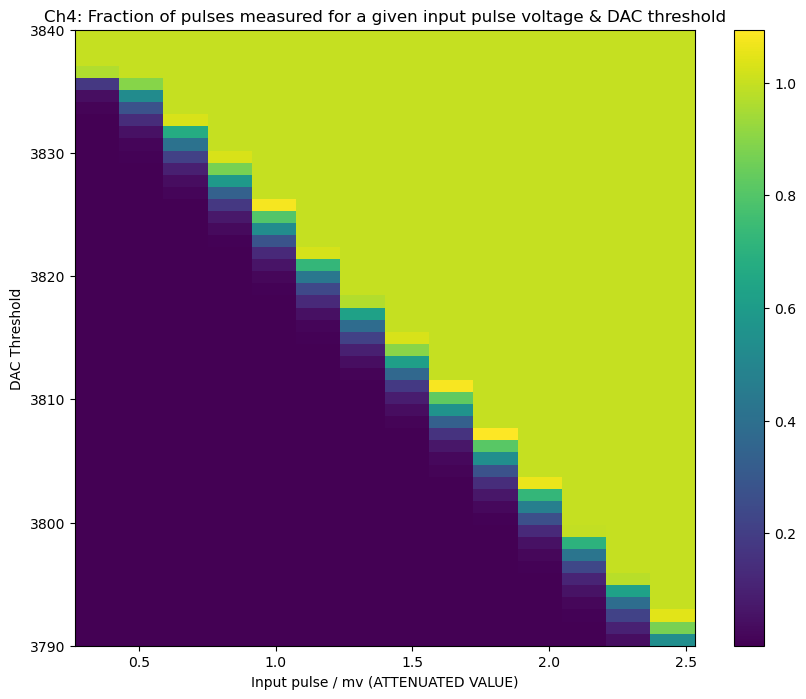

In [36]:
# create 2D histogram from data-dict
x = []
y = []
values = []

for y_value, x_data in data_dict.items():
    y_value = attenuate(int(y_value))
    for x_value, value in x_data.items():
        x.append(int(x_value))    # Convert x keys to integers
        y.append(y_value)    # Convert y keys to integers
        values.append(value/28000)      # Values

# Create a 2D histogram
plt.figure(figsize=(10, 8))
hist = plt.hist2d(y, x, weights=values, bins=[len(set(y)), len(set(x))])

# Add color bar
plt.colorbar(hist[3])

# Labels and title
plt.xlabel('Input pulse / mv (ATTENUATED VALUE)')
plt.ylabel('DAC Threshold')
plt.title(f'Ch{ch_no}: Fraction of pulses measured for a given input pulse voltage & DAC threshold')

# Show the plot
plt.show()


0.26628882291087663
{'3790': 5, '3791': 4, '3792': 1, '3793': 5, '3794': 4, '3795': 1, '3796': 1, '3797': 1, '3798': 5, '3799': 5, '3800': 1, '3801': 5, '3802': 1, '3803': 1, '3804': 1, '3805': 1, '3806': 1, '3807': 1, '3808': 1, '3809': 1, '3810': 1, '3811': 1, '3812': 1, '3813': 5, '3814': 5, '3815': 5, '3816': 1, '3817': 1, '3818': 1, '3819': 1, '3820': 1, '3821': 1, '3822': 1, '3823': 1, '3824': 1, '3825': 1, '3826': 8, '3827': 1, '3828': 1, '3829': 1, '3830': 4, '3831': 5, '3832': 1, '3833': 73, '3834': 293, '3835': 1157, '3836': 4913, '3837': 27000, '3838': 28000, '3839': 28000, '3840': 28000}
0.4405885416553053
{'3790': 1, '3791': 1, '3792': 4, '3793': 1, '3794': 1, '3795': 1, '3796': 1, '3797': 1, '3798': 1, '3799': 1, '3800': 1, '3801': 1, '3802': 5, '3803': 1, '3804': 1, '3805': 4, '3806': 1, '3807': 1, '3808': 1, '3809': 1, '3810': 1, '3811': 1, '3812': 1, '3813': 1, '3814': 1, '3815': 5, '3816': 1, '3817': 9, '3818': 1, '3819': 1, '3820': 1, '3821': 1, '3822': 5, '3823': 1,

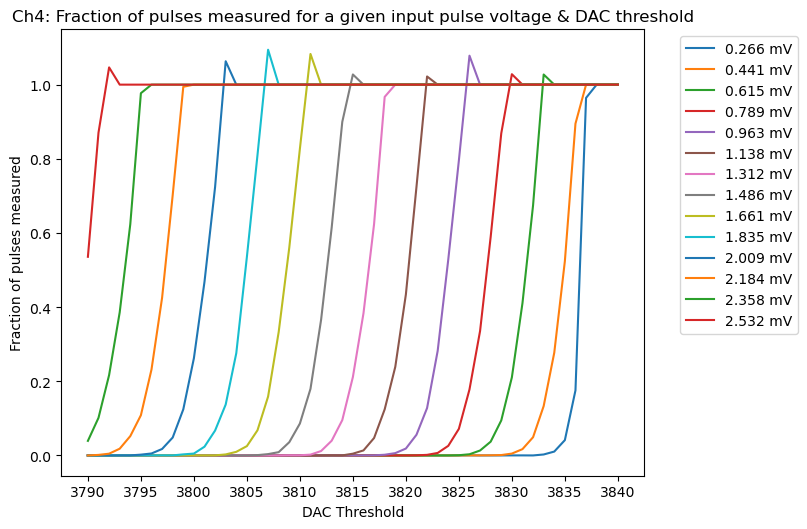

In [50]:
plt.figure(figsize=(8, 5))
for input_voltage, values in data_dict.items():
    input_voltage = attenuate(int(input_voltage))
    print(input_voltage)
    print(values)
    x = []
    y = []
    for dac_threshold, value in values.items():
        x.append(int(dac_threshold))
        y.append(int(value)/28000)
    plt.plot(x, y, label="{0:.3f} mV".format(input_voltage))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  # Optional, to make sure layout is not clipped
plt.xlabel('DAC Threshold')
plt.xticks(np.arange(np.array(x).min(), np.array(x).max()+1, 5))
plt.ylabel('Fraction of pulses measured')
plt.title(f'Ch{ch_no}: Fraction of pulses measured for a given input pulse voltage & DAC threshold')
plt.show()

0.26628882291087663 0.1754642857142857 3836 46
0.4405885416553053 0.5239285714285714 3835 45
0.6148882603997339 0.41075 3831 41
0.7891879791441625 0.5894642857142857 3828 38
0.9634876978885913 0.5284642857142857 3824 34
1.13778741663302 0.4341785714285714 3820 30
1.3120871353774486 0.38335714285714284 3816 26
1.4863868541218772 0.6144642857142857 3813 23
1.6606865728663058 0.5606428571428571 3809 19
1.8349862916107345 0.5355 3805 15
2.0092860103551633 0.46832142857142856 3801 11
2.1835857290995917 0.4253214285714286 3797 7
2.3578854478440205 0.38589285714285715 3793 3
2.532185166588449 0.53575 3790 0


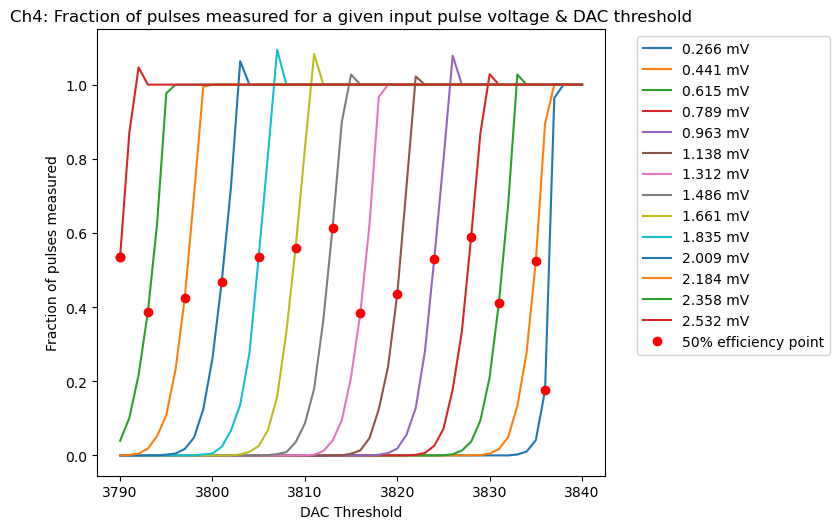

In [51]:
eff_50_points = {}
plt.figure(figsize=(8, 5))

for input_voltage, paired_readings in data_dict.items():
    input_voltage = attenuate(int(input_voltage))
    x = []
    y = []
    for dac_voltage, value in paired_readings.items():
        x.append(int(dac_voltage))
        y.append(int(value)/28000)

    diff_from_mid = np.abs(np.array(y) - 0.5)
    #plt.plot(x, diff_from_mid, label=dac_voltage)

    min_diff = np.argmin(diff_from_mid)
    print(input_voltage,y[min_diff],x[min_diff],min_diff)

    plt.plot(x, y, label="{0:.3f} mV".format(input_voltage))
    plt.plot(x[min_diff], y[min_diff], 'ro')

    eff_50_points[input_voltage] = x[min_diff]

plt.plot(x[min_diff], y[min_diff], 'ro', label='50% efficiency point')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  # Optional, to make sure layout is not clipped
plt.xlabel('DAC Threshold')
plt.xticks(np.arange(np.array(x).min(), np.array(x).max()+1, 10))
plt.ylabel('Fraction of pulses measured')
plt.title(f'Ch{ch_no}: Fraction of pulses measured for a given input pulse voltage & DAC threshold')

plt.show()
    

0.26628882291087663 3836
0.4405885416553053 3835
0.6148882603997339 3831
0.7891879791441625 3828
0.9634876978885913 3824
1.13778741663302 3820
1.3120871353774486 3816
1.4863868541218772 3813
1.6606865728663058 3809
1.8349862916107345 3805
2.0092860103551633 3801
2.1835857290995917 3797
2.3578854478440205 3793
2.532185166588449 3790


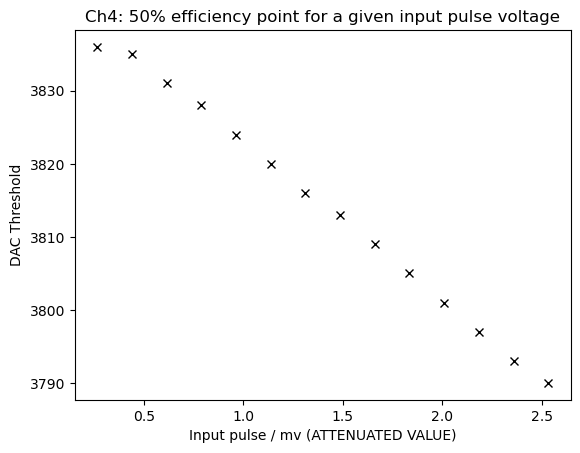

In [53]:
for voltage, values in eff_50_points.items():
    print(voltage, values)
    plt.plot(voltage, values, 'kx')

plt.xlabel('Input pulse / mv (ATTENUATED VALUE)')
plt.ylabel('DAC Threshold')
plt.title(f'Ch{ch_no}: 50% efficiency point for a given input pulse voltage')
plt.show()
    